In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import loaders

# City to download: Chandigarh
city_ref = "barcelona_spain"
bbox = [41.249412966666675, 1.8981843868873254, 41.532978950101025, 2.311865533333333]

pois = loaders.load_pois(city_ref) # no need for shp, it is on hdfs
# kde = loaders.load_grid_kde(city_ref, pois, bbox)

Querying locally for `['pois']`
Found ['pois'] stored locally
Querying locally for `['activity', 'residential', 'total']`
Found ['activity', 'residential', 'total'] stored locally


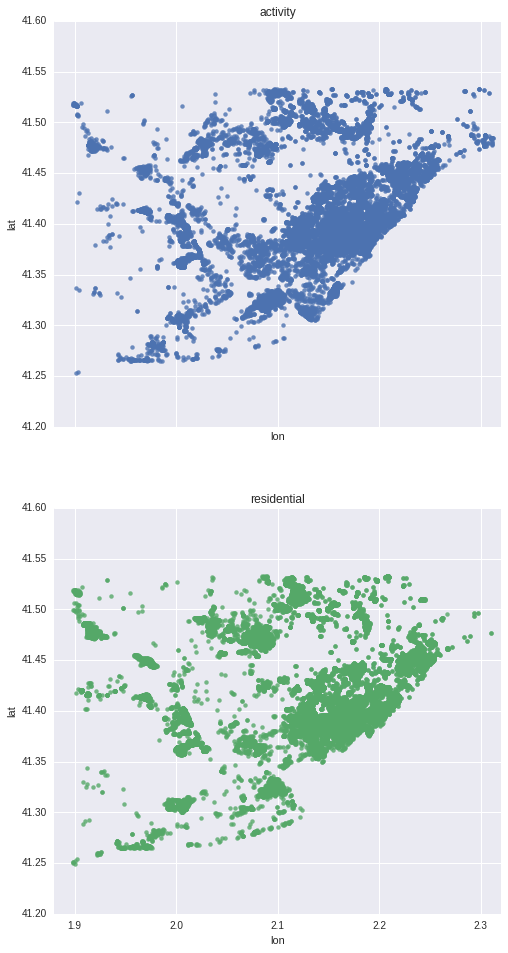

In [8]:
import plots

plots.pois_scatter(pois)

In [3]:
import spatial_measures
import utils

# xx, yy = utils.grid_from_bbox(bbox, .0025)

# f = spatial_measures.grid_cell_pois_count(pois, xx, yy)

In [10]:
# entropy = spatial_measures.relative_entropy(f)
moran = spatial_measures.moran_index(f, xx, yy)
geary = spatial_measures.geary_index(f, xx, yy)

In [11]:
print(moran, geary)

(0.057519801076120827, 1.0656977868537834)


In [21]:
f_act_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='activity'], xx, yy)
f_res_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='residential'], xx, yy)
f_act_kde = spatial_measures.grid_cell_kde_average(kde['activity'].values)
f_res_kde = spatial_measures.grid_cell_kde_average(kde['residential'].values)

In [22]:
moran_act_count = spatial_measures.moran_index(f_act_count, xx, yy)
moran_res_count = spatial_measures.moran_index(f_res_count, xx, yy)
geary_act_count = spatial_measures.geary_index(f_act_count, xx, yy)
geary_res_count = spatial_measures.geary_index(f_res_count, xx, yy)

moran_act_kde = spatial_measures.moran_index(f_act_kde, xx, yy)
moran_res_kde = spatial_measures.moran_index(f_res_kde, xx, yy)
geary_act_kde = spatial_measures.geary_index(f_act_kde, xx, yy)
geary_res_kde = spatial_measures.geary_index(f_res_kde, xx, yy)

entropy_act_kde = spatial_measures.relative_entropy(f_act_kde)
entropy_res_kde = spatial_measures.relative_entropy(f_res_kde)

In [23]:
print("Moran")
print("\tActivities: count %f, kde %f" % (moran_act_count, moran_act_kde))
print("\tResidential: count %f, kde %f" % (moran_res_count, moran_res_kde))

print("Geary")
print("\tActivities: count %f, kde %f" % (geary_act_count, geary_act_kde))
print("\tResidential: count %f, kde %f" % (geary_res_count, geary_res_kde))

print("Entropy")
print("\tActivities: kde %f" % entropy_act_kde)
print("\tResidential: kde %f" % entropy_res_kde)

Moran
	Activities: count 0.043211, kde 0.311009
	Residential: count 0.047208, kde 0.764790
Geary
	Activities: count 1.064254, kde 0.682800
	Residential: count 1.079402, kde 0.238920
Entropy
	Activities: kde 0.900009
	Residential: kde 0.843487


In [6]:
import kde
# only the city itself (no metro area)
bbox_city = [41.3397, 2.0960, 41.4654, 2.2361]

pois_city = pois[(pois['lon'] > bbox_city[1]) & (pois['lon'] < bbox_city[3]) & (
    pois['lat'] > bbox_city[0]) & (pois['lat'] < bbox_city[2])]

xx_city, yy_city = utils.grid_from_bbox(bbox_city, .0025)

kde_city = kde.get_grid_all_kde(pois_city, bbox_city, .0025)

f_city_act_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='activity'], xx_city, yy_city)
f_city_res_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='residential'], xx_city, yy_city)
f_city_act_kde = spatial_measures.grid_cell_kde_average(kde_city['activity'].values)
f_city_res_kde = spatial_measures.grid_cell_kde_average(kde_city['residential'].values)

In [7]:
moran_city_act_count = spatial_measures.moran_index(f_city_act_count, xx_city, yy_city)
moran_city_res_count = spatial_measures.moran_index(f_city_res_count, xx_city, yy_city)
geary_city_act_count = spatial_measures.geary_index(f_city_act_count, xx_city, yy_city)
geary_city_res_count = spatial_measures.geary_index(f_city_res_count, xx_city, yy_city)

# moran_city_act_kde = spatial_measures.moran_index(f_city_act_kde, xx_city, yy_city)
# moran_city_res_kde = spatial_measures.moran_index(f_city_res_kde, xx_city, yy_city)
# geary_city_act_kde = spatial_measures.geary_index(f_city_act_kde, xx_city, yy_city)
# geary_city_res_kde = spatial_measures.geary_index(f_city_res_kde, xx_city, yy_city)

entropy_city_act_kde = spatial_measures.relative_entropy(f_city_act_kde)
entropy_city_res_kde = spatial_measures.relative_entropy(f_city_res_kde)

In [10]:
print("Moran")
print("\tActivities: %f" % moran_city_act_count)
print("\tResidential: %f" % moran_city_res_count)

print("Geary")
print("\tActivities: %f" % geary_city_act_count)
print("\tResidential: %f" % geary_city_res_count)

print("Entropy")
print("\tActivities: %f" % entropy_city_act_kde)
print("\tResidential: %f" % entropy_city_res_kde)

Moran
	Activities: 0.083564
	Residential: 0.076815
Geary
	Activities: 0.982515
	Residential: 1.034897
Entropy
	Activities: 0.923664
	Residential: 0.870649
